# Baseline MVP

Use word frequency to compare the corpora.

~ Bednarek:
+ raw freqs
+ normalised freqs
+ ranked freqs table of n-grams


1. Create corpora (i.e. corpus A and corpus B)

 2. Detect corpus nature - e.g. with mean of words (if low, most likely tweets), POS tag sequences are not normal (probably colloquial language)
     1. Anomaly detection -- see if there are any outliers.

3. Make suggestions as to what to do?

4. Juxtapose the 2 corpora

In [1]:
from pprint import pprint
import pandas as pd

In [2]:
from juxtorpus.corpus import Corpus

corpusA = Corpus.from_disk('../assets/samples/tweetsA.csv').preprocess()
corpusB = Corpus.from_disk('../assets/samples/tweetsB.csv').preprocess()

corpusA.summary(), corpusB.summary()

(Number of words           209
 Number of unique words    154
 dtype: int64,
 Number of words           332
 Number of unique words    170
 dtype: int64)

# Jux
The juxtorpus main tool: Jux

In [3]:
from juxtorpus.jux import Jux

jux = Jux(corpusA, corpusB)

In [4]:
tf_kw = jux.keywords(method="tf")
tf_kw[0][:3], tf_kw[1][:3]

([('@verge', 0.9569377990430622),
  ('helicopter', 0.9569377990430622),
  ('good', 0.9569377990430622)],
 [(' ', 4.216867469879518),
  ('\n ', 1.5060240963855422),
  ('mexico', 1.2048192771084338)])

In [5]:
rake_kw = jux.keywords(method='rake')  # not great for tweets.
rake_kw[0][:3], rake_kw[1][:3]

([('xe2', 3), ('x80', 3), ('xa6', 2)],
 [('co', 8), ('https ://', 7), ('mexico', 4)])

In [6]:
tfidf_kw = jux.keywords(method='tfidf')
tfidf_kw[0][:3], tfidf_kw[1][:3]

([('helicopter', 2.0), ('of', 1.3333333333333333), ("'s", 1.25)],
 [('a', 2.0), ('always', 2.0), ('the', 1.5714285714285714)])

# Visualisation

## Relative Bar

This shows the relative scores of the shared words between the 2 corpus.

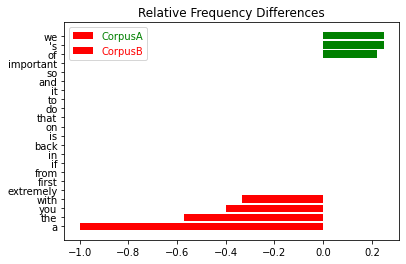

In [7]:
from juxtorpus.viz.polarity_bar import PolarityBar

pb = PolarityBar.from_(tfidf_kw[0], tfidf_kw[1], top=50)
pb.relative().render()

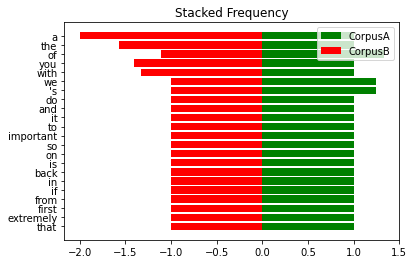

In [8]:
pb.stack().render()

## Word Cloud

Colour = bias between the corpus

Optional: Tweet mask

In [11]:
from juxtorpus.viz.polarity_wordcloud import PolarityWordCloud

pwc = PolarityWordCloud.from_(tfidf_kw[0], tfidf_kw[1], top=50)

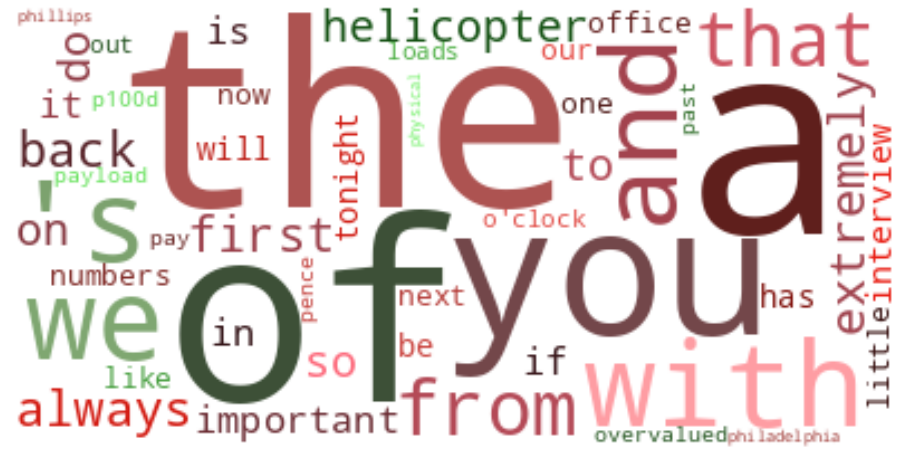

In [12]:
pwc.gradate().render()